# Projections of ICU need by Country
> Modeling current and future ICU demand.

- categories: [overview]
- author: <a href=https://github.com/artdgn/>artdgn</a>
- image: images/covid-progress-projections.png
- permalink: /covid-progress-projections/
- toc: false
- hide: false

> Warning: This dashboard was not prepared by an Epidemiologist and contains speculative information.  This data should not be used for public health or policy making without fully understanding the assumptions and methodology presented.

In [1]:
#hide
import pandas as pd
import overview_helpers

helper = overview_helpers.OverviewDataExtras
df = helper.filter_df(helper.table_with_projections())
df.columns

Index(['Cases.new', 'Cases.new.est', 'Cases.new.per100k',
       'Cases.new.per100k.est', 'Cases.total', 'Cases.total.est',
       'Cases.total.per100k', 'Cases.total.per100k.est', 'Continent',
       'Deaths.new', 'Deaths.new.per100k', 'Deaths.total',
       'Deaths.total.per100k', 'Fatality Rate', 'affected_ratio',
       'affected_ratio.est', 'affected_ratio.est.+14d',
       'affected_ratio.est.+30d', 'affected_ratio.est.+60d',
       'affected_ratio.est.+7d', 'affected_ratio.est.+90d', 'growth_rate',
       'icu_capacity_per100k', 'icu_spare_capacity_per100k', 'needICU.per100k',
       'needICU.per100k.+14d', 'needICU.per100k.+30d', 'needICU.per100k.+60d',
       'needICU.per100k.+7d', 'needICU.per100k.+90d', 'peak_icu_neek_per100k',
       'population', 'testing_bias'],
      dtype='object')

## Estimated need for ICU beds

> Countries sorted by current ICU demand

- ICU need is estimated as [6% of active cases](https://medium.com/@joschabach/flattening-the-curve-is-a-deadly-delusion-eea324fe9727).
- ICU capacities are from [Wikipedia](https://en.wikipedia.org/wiki/List_of_countries_by_hospital_beds) (OECD countries mostly) and [CCB capacities in Asia](https://www.researchgate.net/publication/338520008_Critical_Care_Bed_Capacity_in_Asian_Countries_and_Regions).
- ICU spare capacity is based on 70% normal occupancy rate ([66% in US](https://www.sccm.org/Blog/March-2020/United-States-Resource-Availability-for-COVID-19), [75% OECD](https://www.oecd-ilibrary.org/social-issues-migration-health/health-at-a-glance-2019_4dd50c09-en))
- Details of estimation and prediction calculations are in [Appendix](#appendix).
- Column definitions:
    - <font size=2><b>Estimated ICU need per 100k population</b>: number of ICU beds estimated to be needed per 100k population by COVID-19 patents.</font>
    - <font size=2><b>Projected in 14 days</b>: projected ICU need per 100k population in 14 days.</font>
    - <font size=2><b>Projected in 30 days</b>: projected ICU need per 100k population in 30 days.</font>
    - <font size=2><b>ICU capacity per 100k</b>: number of ICU beds per 100k population.</font>
    - <font size=2><b>Estimated ICU Spare capacity per 100k</b>: estimated ICU capacity per 100k population based on assumed normal occupancy rate of 70% and number of ICU beds (only for countries with ICU beds data).</font>
    - <font size=2><b>Estimated daily case growth rate</b>: percentage daily change in total cases during last 5 days.</font>

In [2]:
#hide_input
rename_cols = {'needICU.per100k': 'Estimated <br> ICU need <br> per 100k <br> population',
               'needICU.per100k.+14d': 'Projected <br> In 14 days', 
               'needICU.per100k.+30d': 'Projected <br> In 30 days',               
               'icu_capacity_per100k': 'ICU <br> capacity <br> per 100k',
               'icu_spare_capacity_per100k': 'Estimated ICU <br> Spare capacity <br> per 100k',               
               'growth_rate': 'Estimated <br> daily case <br> growth rate',
              }
icu_cols = list(rename_cols.values())[:3]
df_icu_bars = df.rename(rename_cols, axis=1)
df_icu_bars.sort_values(rename_cols['needICU.per100k'], ascending=False)\
[rename_cols.values()].style\
    .bar(subset=icu_cols[0], color='#b21e3e', vmin=0, vmax=10)\
    .bar(subset=icu_cols[1], color='#f43d64', vmin=0, vmax=10)\
    .bar(subset=icu_cols[2], color='#ef8ba0', vmin=0, vmax=10)\
    .bar(subset=[rename_cols['icu_spare_capacity_per100k']], color='#3ab1d8', vmin=0, vmax=10)\
    .applymap(lambda _: 'color: blue', subset=[rename_cols['icu_spare_capacity_per100k']])\
    .bar(subset=[rename_cols['growth_rate']], color='#d65f5f', vmin=0, vmax=0.33)\
    .format('<b>{:.1%}</b>', subset=[rename_cols['growth_rate']])\
    .format('<b>{:.1f}</b>', subset=[rename_cols['icu_capacity_per100k']], na_rep="-")\
    .format('<b>{:.1f}</b>', subset=[rename_cols['icu_spare_capacity_per100k']], na_rep="-")\
    .format('<b>{:.2f}</b>', subset=icu_cols)\
    .set_precision(2)

,Estimated ICU need per 100k population,Projected In 14 days,Projected In 30 days,ICU capacity per 100k,Estimated ICU Spare capacity per 100k,Estimated daily case growth rate
Country/Region,,,,,,
US,1.12,3.73,14.84,34.7,10.4,11.2%
France,0.83,3.28,11.43,11.6,3.5,12.8%
Spain,0.77,1.18,1.85,9.7,2.9,5.5%
Italy,0.63,0.87,1.27,12.5,3.8,3.7%
United Kingdom,0.57,1.94,6.95,6.6,2.0,11.6%
Iran,0.17,0.26,0.41,4.6,1.4,4.9%
Belgium,0.12,0.25,0.58,15.9,4.8,8.2%
Netherlands,0.11,0.20,0.40,6.4,1.9,6.6%
Germany,0.10,0.17,0.32,29.2,8.8,5.7%


# Appendix

## Projected Affected Population percentage

> Countries sorted by number of new cases in last 5 days.  The projected affected population percentage is directly related to the calculation of estimated ICU need.

- Column definitions:
    - <font size=2><b>Estimated <i>new</i> cases in last 5 days</b>: estimated new cases in last 5 days.</font>
    - <font size=2><b>Estimated <i>total</i> affected population percentage</b>: estimated percentage of total population already affected (infected, recovered, or dead).</font>
    - <font size=2><b>Projected in 14 days</b>: projected percentage of total affected population in 14 days.</font>
    - <font size=2><b>Projected in 30 days</b>: projected percentage of total affected population in 30 days.</font>
    - <font size=2><b>Reported fatality percentage</b>: reported total deaths divided by total cases.</font>
    - <font size=2><b>Estimated daily case growth rate</b>: percentage daily change in total cases during last 5 days</font>.

In [3]:
#hide_input
rename_cols = {'Cases.new.est': 'Estimated <br> <i>new</i> cases <br> in last 5 days', 
               'affected_ratio.est': 'Estimated <br> <i>total</i> affected <br> population <br> percentage',
               'affected_ratio.est.+14d': 'Projected <br> In 14 days',
               'affected_ratio.est.+30d': 'Projected <br> In 30 days',
               'Fatality Rate': 'Reported <br> fatality <br> percentage',
               'growth_rate': 'Estimated <br> daily case <br> growth rate',
              }
progress_cols = list(rename_cols.values())[:4]
df_progress_bars = df.rename(rename_cols, axis=1)
df_progress_bars.sort_values(rename_cols['Cases.new.est'], ascending=False)\
[rename_cols.values()].style\
    .bar(subset=progress_cols[0], color='#b57b17')\
    .bar(subset=progress_cols[1], color='#5dad64', vmin=0, vmax=1.0)\
    .bar(subset=progress_cols[2], color='#719974', vmin=0, vmax=1.0)\
    .bar(subset=progress_cols[3], color='#a1afa3', vmin=0, vmax=1.0)\
    .bar(subset=[rename_cols['Fatality Rate']], color='#420412', vmin=0, vmax=0.1)\
    .applymap(lambda _: 'color: red', subset=[rename_cols['Fatality Rate']])\
    .bar(subset=[rename_cols['growth_rate']], color='#d65f5f', vmin=0, vmax=0.33)\
    .format('<b>{:,.0f}</b>', subset=list(rename_cols.values())[0])\
    .format('<b>{:.1%}</b>', subset=list(rename_cols.values())[1:])

,Estimated new cases in last 5 days,Estimated total affected population percentage,Projected In 14 days,Projected In 30 days,Reported fatality percentage,Estimated daily case growth rate
Country/Region,,,,,,
US,"781,980",0.6%,2.2%,9.4%,2.9%,11.2%
France,"602,516",2.2%,9.4%,38.4%,9.0%,12.8%
United Kingdom,"406,861",1.4%,5.5%,22.2%,10.3%,11.6%
Spain,"361,478",3.2%,6.8%,13.3%,9.8%,5.5%
Italy,"247,778",2.5%,4.4%,7.8%,12.5%,3.7%
Iran,"84,003",0.5%,0.9%,1.7%,6.2%,4.9%
Belgium,"68,814",1.8%,5.0%,13.3%,7.8%,8.2%
Turkey,"68,342",0.2%,0.9%,5.7%,2.1%,13.8%
Netherlands,"59,807",1.3%,3.0%,7.0%,9.9%,6.6%


<a id='appendix'></a>
## Methodology & Assumptions

- Total case estimation calculated from deaths by:
    - Assuming that unbiased fatality rate is 1.5% (from heavily tested countries / the cruise ship data) and that it takes 8 days on average for a case to go from being confirmed positive (after incubation + testing lag) to death. This is the same figure used by ["Estimating The Infected Population From Deaths"](https://covid19dashboards.com/covid-infected/) in this repo.
    - Testing bias: the actual lagged fatality rate is than divided by the 1.5% figure to estimate the testing bias in a country. The estimated testing bias then multiplies the reported case numbers to estimate the *true* case numbers (*=case numbers if testing coverage was as comprehensive as in the heavily tested countries*).
    - The testing bias calculation is a high source of uncertainty in all these estimations and projections. Better source of testing bias (or just *true case* numbers), should make everything more accurate.
- Projection is done using a simple [SIR model](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology#The_SIR_model) with (see [examples](#examples)) combined with the approach in [Total Outstanding Cases](https://covid19dashboards.com/outstanding_cases/#Appendix:-Methodology-of-Predicting-Recovered-Cases):
    - Growth rate calculated over the 5 past days. This is pessimistic - because it includes the testing rate growth rate as well, and is slow to react to both improvements in test coverage and "flattening" due to social isolation.
    - Recovery probability being 1/20 (for 20 days to recover) where the rate estimated from [Total Outstanding Cases](https://covid19dashboards.com/outstanding_cases/#Appendix:-Methodology-of-Predicting-Recovered-Cases) is too high (on down-slopes).
- ICU need is calculated as being [6% of active cases](https://medium.com/@joschabach/flattening-the-curve-is-a-deadly-delusion-eea324fe9727) where:
    - Active cases are taken from the SIR model.
    - This is both pessimistic - because real ICU rate may in reality be lower, due to testing biases, and especially in "younger" populations), and optimistic - because active cases which are on ICU take longer (so need the ICUs for longer).
    - ICU capacities are from [Wikipedia](https://en.wikipedia.org/wiki/List_of_countries_by_hospital_beds) (OECD countries mostly) and [CCB capacities in Asia](https://www.researchgate.net/publication/338520008_Critical_Care_Bed_Capacity_in_Asian_Countries_and_Regions).
    - ICU spare capacity is based on 70% normal occupancy rate ([66% in US](https://www.sccm.org/Blog/March-2020/United-States-Resource-Availability-for-COVID-19), [75% OECD](https://www.oecd-ilibrary.org/social-issues-migration-health/health-at-a-glance-2019_4dd50c09-en))

<a id='examples'></a>

**Examples of modeling plots**

For the 5 countries with highest estimated number of new cases.
> Note: The purpose of the below plots is to demonstrate the actual calculations used in the tables above and the dynamics of the model.

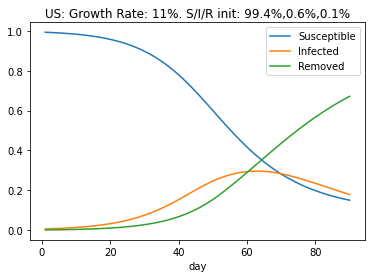

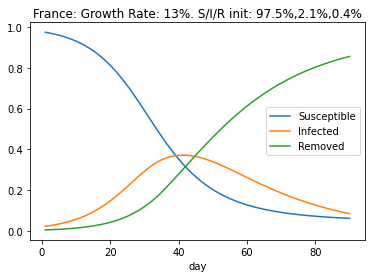

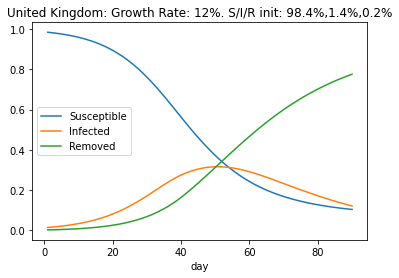

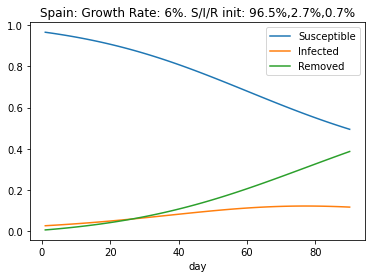

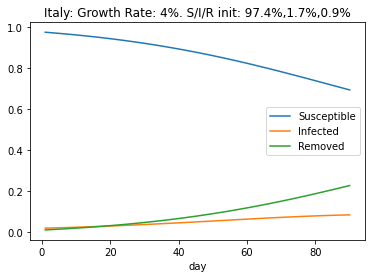

In [4]:
#hide_input
sir_plot_countries = df.sort_values('Cases.new.est', ascending=False).head(5).index
helper.table_with_projections(plot_countries=sir_plot_countries);